In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
base_dados = pd.read_csv(r'C:\Users\win10\Desktop\curso_python\projetos dados\Dados_Incendio.csv', encoding='latin-1')

base_dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
#Verificando campos nulos
base_dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [4]:
#Estatisticas
base_dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [5]:
#Campos unicos
base_dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [6]:
base_dados.groupby(by='year')['number'].sum().reset_index()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


In [7]:
#Variavel com o groupby de ano
analise_ano = base_dados.groupby(by='year')['number'].sum().reset_index()

In [8]:
analise_ano.head()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600


Text(0, 0.5, 'Quantidade')

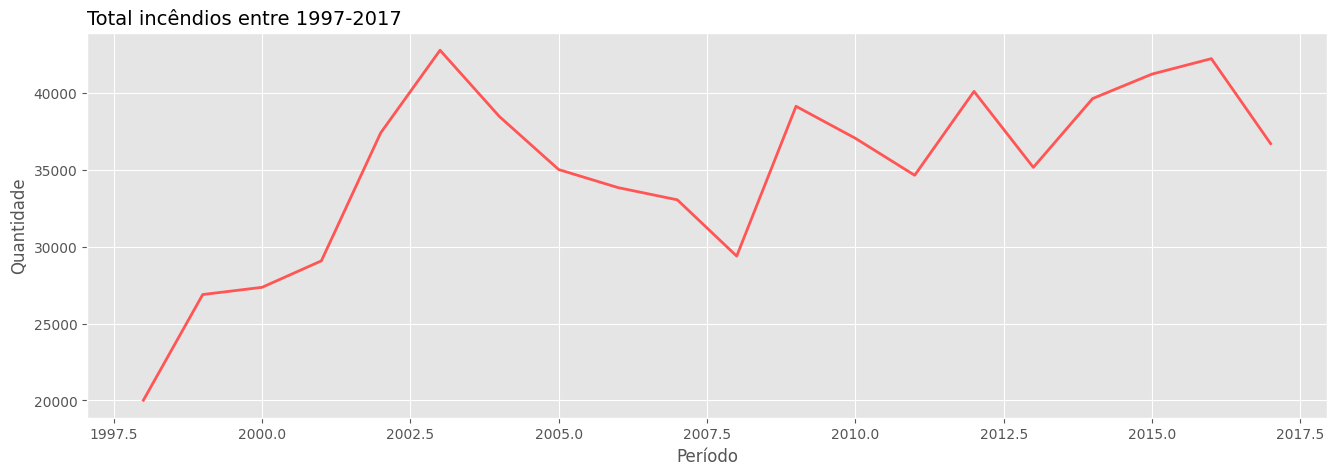

In [9]:
#Criando o grafico
plt.figure(figsize=(16,5))
plt.style.use('ggplot')
plt.title('Total incêndios entre 1997-2017', loc='left', fontsize=14)
sns.lineplot(data=analise_ano, x='year', y='number', estimator='sum', lw=2, color='#ff5555')
plt.xlabel('Período')
plt.ylabel('Quantidade')

In [10]:
#Variavel com o groupby de mês
analise_mes = base_dados.groupby(by=['month', 'year'])['number'].sum().reset_index()
analise_mes.head()

,month,year,number
0,Abril,1998,0.0
1,Abril,1999,717.0
2,Abril,2000,537.0
3,Abril,2001,1081.0
4,Abril,2002,1682.0


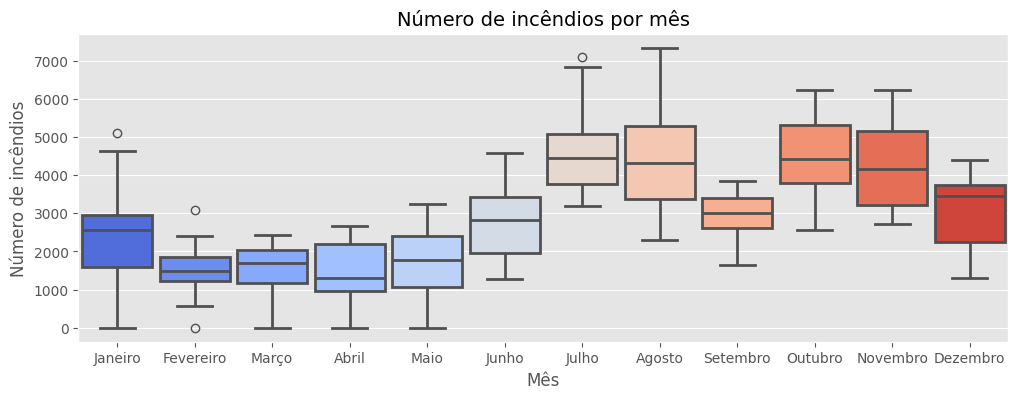

In [35]:
#Grafico com número de incêndios por mês
plt.figure(figsize=(12,4))
plt.title('Número de incêndios por mês', fontsize=14)
sns.boxplot(data=analise_mes, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
             order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
             'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )
plt.xlabel('Mês')
plt.ylabel('Número de incêndios');

In [12]:
#Variavel com o numero decrescente de queimadas por estado 
analise_estado = base_dados.groupby(by=['state'])['number'].sum().reset_index().sort_values('number', ascending=False)
analise_estado.head()

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


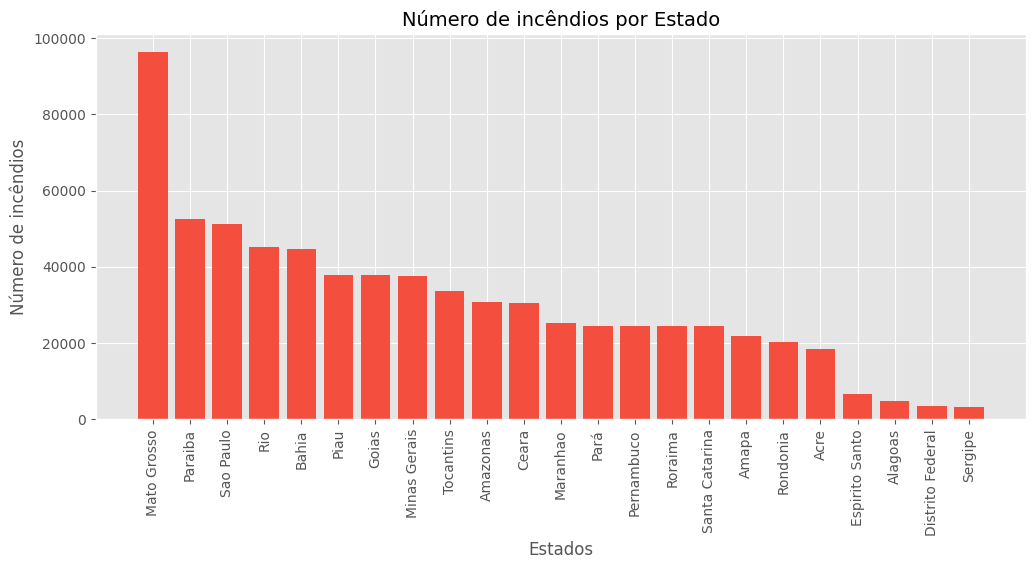

In [13]:
#Grafico de barras com o numero de incendios por estado
plt.figure(figsize=(12,5))
plt.title('Número de incêndios por Estado', fontsize=14)
plt.bar(analise_estado['state'], analise_estado['number'], color='#f44e3f')
plt.xlabel('Estados')
plt.ylabel('Número de incêndios')
plt.xticks(rotation=90);

In [14]:
#Selecionando os 5 estados com maior numero de queimadas
analise_estado['state'][0:5].values

array(['Mato Grosso', 'Paraiba', 'Sao Paulo', 'Rio', 'Bahia'],
      dtype=object)

In [15]:
#Criando variaves da lista acima
lista_top5 = analise_estado['state'][0:5].values

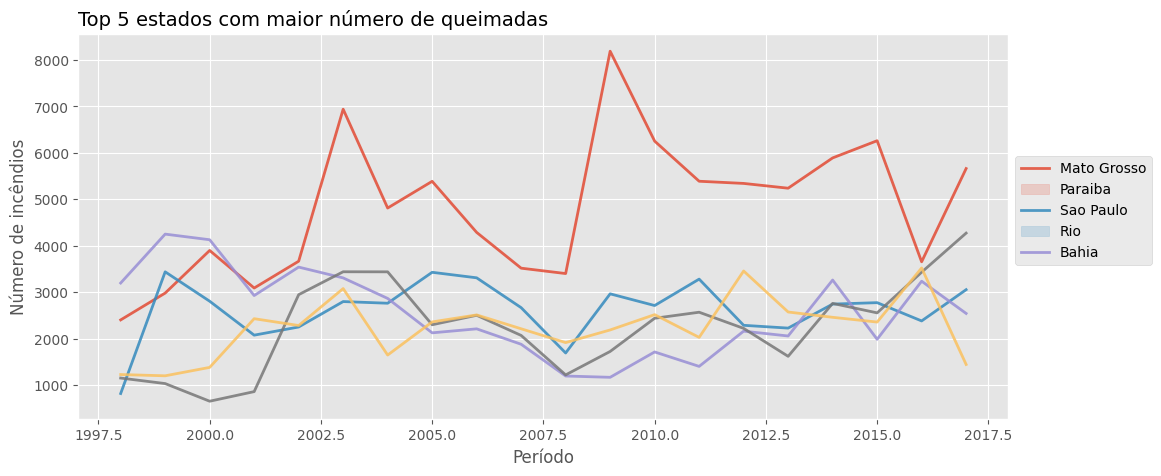

In [16]:
#Grafico de linha com os 5 estados com maior numero de queimadas
plt.figure(figsize=(12,5))
plt.title('Top 5 estados com maior número de queimadas', loc = 'left', fontsize = 14)
for coluna in lista_top5:
    filtro = base_dados.loc[base_dados['state'] == coluna]
    analise_local = filtro.groupby( by=['year']).sum().reset_index()
    sns.lineplot(data=analise_local, x='year', y='number', lw=2, alpha=0.85)
plt.xlabel('Período')
plt.ylabel('Número de incêndios')
plt.legend(lista_top5, bbox_to_anchor=(1,0.7));

In [17]:
analise_estado.sort_values('state')['state'].values

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Paraiba', 'Pará', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [18]:
analise_estado.sort_values('state')['number'].values

array([18464.03 ,  4644.   , 21831.576, 30650.129, 44746.226, 30428.063,
        3561.   ,  6546.   , 37695.52 , 25129.131, 96246.028, 37475.258,
       52435.918, 24512.144, 24498.   , 37803.747, 45160.865, 20285.429,
       24385.074, 24359.852, 51121.198,  3237.   , 33707.885])

In [31]:
estados = analise_estado.sort_values('state')['state'].values
valores = analise_estado.sort_values('state')['number'].values

# Latitudes
lat = [ -8.77, -9.71, 1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55, -12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28, -22.84, -11.22, 1.89, -27.33, -23.55, -10.90, -10.25 ]

# Longitudes
log = [ -70.55, -35.73, -51.77, -61.66, -38.51, -38.54,	-47.86, -40.34, -49.31, -44.30, -55.42, -44.38,	
       -35.55, -52.29, -35.07, -43.68, -43.15, -62.80, -61.22, -49.44, -46.64, -37.07, -48.25 ]

# Organizados os dados
dicionario = {
    'Estados' : estados,
    'Latitude' : lat,
    'Longitude' : log,
    'Incêndios' : valores
}

# Lendo o dicionario
analise_geografica = pd.DataFrame ( dicionario )

analise_geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [34]:
import plotly.express as px

fig = px.density_mapbox(
    analise_geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center = dict(lat=-14.2350, lon=-51.9253),
    zoom=3,
    mapbox_style='open-street-map'

)

fig.show()